In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DIRECTORY = '/content/drive/MyDrive/Dataset-Unicauca-Version2-87Atts.csv'
data = pd.read_csv(DIRECTORY)

In [ ]:
data.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [ ]:
data.shape

(3577296, 87)

In [ ]:
data.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577296 entries, 0 to 3577295
Data columns (total 87 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow.ID                      object 
 1   Source.IP                    object 
 2   Source.Port                  int64  
 3   Destination.IP               object 
 4   Destination.Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow.Duration                int64  
 8   Total.Fwd.Packets            int64  
 9   Total.Backward.Packets       int64  
 10  Total.Length.of.Fwd.Packets  int64  
 11  Total.Length.of.Bwd.Packets  float64
 12  Fwd.Packet.Length.Max        int64  
 13  Fwd.Packet.Length.Min        int64  
 14  Fwd.Packet.Length.Mean       float64
 15  Fwd.Packet.Length.Std        float64
 16  Bwd.Packet.Length.Max        int64  
 17  Bwd.Packet.Length.Min        int64  
 18  Bwd.Packet.Length.Mean       float64
 19  

In [ ]:
non_num_cols = [col for col in data.columns if data[col].dtype == 'O']
non_num_data = data[non_num_cols]
non_num_data

,Flow.ID,Source.IP,Destination.IP,Timestamp,Label,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,10.200.7.7,26/04/201711:11:17,BENIGN,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,172.19.1.46,26/04/201711:11:17,BENIGN,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,10.200.7.217,26/04/201711:11:17,BENIGN,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,10.200.7.217,26/04/201711:11:17,BENIGN,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,10.200.7.7,26/04/201711:11:17,BENIGN,HTTP_PROXY
...,...,...,...,...,...,...
3577291,10.200.7.199-98.138.79.73-42135-443-6,98.138.79.73,10.200.7.199,15/05/201705:43:40,BENIGN,SSL
3577292,10.200.7.217-98.138.79.73-51546-443-6,98.138.79.73,10.200.7.217,15/05/201705:46:10,BENIGN,SSL
3577293,10.200.7.218-98.138.79.73-44366-443-6,98.138.79.73,10.200.7.218,15/05/201705:45:39,BENIGN,SSL
3577294,10.200.7.195-98.138.79.73-52341-443-6,98.138.79.73,10.200.7.195,15/05/201705:45:59,BENIGN,SSL


In [ ]:
[(col, non_num_data[col].nunique()) for col in non_num_cols]

[('Flow.ID', 1522917),
 ('Source.IP', 6566),
 ('Destination.IP', 22824),
 ('Timestamp', 41915),
 ('Label', 1),
 ('ProtocolName', 78)]

In [ ]:
def summarize_cat(col_name):
    sorted_values = sorted(non_num_data[col_name].value_counts().iteritems(), key = lambda x:x[1], reverse=True)
    remaining_per = 100
    for (value, count) in sorted_values:
        per = count / len(non_num_data) * 100
        if per >= 1:
            print(f'{value} : {per:.2f}%')
        else :
            print(f'Others : {remaining_per:.2f}%')
            break
        remaining_per = remaining_per - per

In [ ]:
for col in non_num_cols:
    print(f"Summary of {col} column : ")
    summarize_cat(col)
    print('\n')

Summary of Flow.ID column : 
Others : 100.00%


Summary of Source.IP column : 
10.200.7.218 : 8.26%
10.200.7.217 : 7.49%
10.200.7.199 : 6.28%
10.200.7.195 : 5.34%
10.200.7.194 : 5.08%
10.200.7.196 : 4.93%
10.200.7.9 : 3.47%
10.200.7.6 : 3.00%
10.200.7.5 : 2.85%
10.200.7.4 : 2.84%
10.200.7.8 : 2.58%
10.200.7.7 : 2.51%
Others : 45.37%


Summary of Destination.IP column : 
10.200.7.8 : 9.03%
10.200.7.7 : 8.81%
10.200.7.9 : 6.25%
10.200.7.5 : 5.46%
10.200.7.6 : 5.34%
10.200.7.4 : 5.16%
10.200.7.218 : 1.08%
10.200.7.217 : 1.05%
Others : 57.83%


Summary of Timestamp column : 
Others : 100.00%


Summary of Label column : 
BENIGN : 100.00%


Summary of ProtocolName column : 
GOOGLE : 26.81%
HTTP : 19.11%
HTTP_PROXY : 17.42%
SSL : 11.32%
HTTP_CONNECT : 8.88%
YOUTUBE : 4.77%
AMAZON : 2.43%
MICROSOFT : 1.53%
GMAIL : 1.13%
Others : 6.60%




In [ ]:
num_cols = list(set(data.columns) - set(non_num_cols))
num_cols

['Fwd.PSH.Flags',
 'Flow.IAT.Max',
 'Bwd.Avg.Bytes.Bulk',
 'Idle.Mean',
 'PSH.Flag.Count',
 'Packet.Length.Mean',
 'Avg.Fwd.Segment.Size',
 'Subflow.Bwd.Packets',
 'Packet.Length.Std',
 'Fwd.Avg.Bytes.Bulk',
 'Flow.Packets.s',
 'Fwd.IAT.Min',
 'Min.Packet.Length',
 'Bwd.Packet.Length.Min',
 'Active.Std',
 'Bwd.Packet.Length.Mean',
 'Active.Max',
 'Flow.IAT.Min',
 'L7Protocol',
 'ACK.Flag.Count',
 'Total.Length.of.Bwd.Packets',
 'Fwd.IAT.Max',
 'Fwd.Packets.s',
 'Source.Port',
 'Subflow.Bwd.Bytes',
 'Idle.Min',
 'Fwd.Header.Length.1',
 'Subflow.Fwd.Packets',
 'Down.Up.Ratio',
 'Bwd.IAT.Max',
 'Flow.IAT.Mean',
 'Bwd.IAT.Total',
 'Fwd.Packet.Length.Mean',
 'min_seg_size_forward',
 'ECE.Flag.Count',
 'URG.Flag.Count',
 'Fwd.URG.Flags',
 'Avg.Bwd.Segment.Size',
 'RST.Flag.Count',
 'Init_Win_bytes_backward',
 'Flow.Duration',
 'Fwd.Header.Length',
 'Active.Min',
 'CWE.Flag.Count',
 'Fwd.Avg.Bulk.Rate',
 'Flow.IAT.Std',
 'Init_Win_bytes_forward',
 'Fwd.Packet.Length.Min',
 'act_data_pkt_fwd',

In [ ]:
data[num_cols].describe()

,Fwd.PSH.Flags,Flow.IAT.Max,Bwd.Avg.Bytes.Bulk,Idle.Mean,PSH.Flag.Count,Packet.Length.Mean,Avg.Fwd.Segment.Size,Subflow.Bwd.Packets,Packet.Length.Std,Fwd.Avg.Bytes.Bulk,...,Bwd.Packet.Length.Std,Bwd.IAT.Mean,Max.Packet.Length,Total.Fwd.Packets,Fwd.Packet.Length.Max,SYN.Flag.Count,Fwd.Avg.Packets.Bulk,Fwd.Packet.Length.Std,Fwd.IAT.Total,Bwd.Avg.Packets.Bulk
count,3.577296e+06,3.577296e+06,3577296.0,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3577296.0,...,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3577296.0,3.577296e+06,3.577296e+06,3577296.0
mean,1.720414e-01,1.285020e+07,0.0,8.524211e+06,4.058210e-01,1.988191e+02,1.149212e+02,6.534083e+01,3.035190e+02,0.0,...,2.898878e+02,2.476877e+06,1.333250e+03,6.237799e+01,5.123645e+02,1.720414e-01,0.0,1.520501e+02,2.418796e+07,0.0
std,3.774165e-01,2.076518e+07,0.0,1.706568e+07,4.910503e-01,3.327427e+02,2.464707e+02,1.108092e+03,4.326083e+02,0.0,...,4.853004e+02,7.578111e+06,2.453395e+03,1.094086e+03,1.039319e+03,3.774165e-01,0.0,2.404702e+02,3.962563e+07,0.0
min,0.000000e+00,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
25%,0.000000e+00,5.700000e+02,0.0,0.000000e+00,0.000000e+00,6.000000e+00,6.000000e+00,1.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,6.000000e+00,2.000000e+00,6.000000e+00,0.000000e+00,0.0,0.000000e+00,7.000000e+00,0.0
50%,0.000000e+00,2.812395e+05,0.0,0.000000e+00,0.000000e+00,6.283333e+01,4.657143e+01,5.000000e+00,1.069828e+02,0.0,...,3.242474e+01,1.558765e+04,3.550000e+02,6.000000e+00,2.060000e+02,0.000000e+00,0.0,7.421124e+01,3.892645e+05,0.0
75%,0.000000e+00,2.391546e+07,0.0,7.506747e+06,1.000000e+00,2.500000e+02,1.225000e+02,1.500000e+01,4.818125e+02,0.0,...,4.232105e+02,3.342142e+05,1.460000e+03,1.500000e+01,6.130000e+02,0.000000e+00,0.0,2.079035e+02,4.001161e+07,0.0
max,1.000000e+00,1.200000e+08,0.0,1.200000e+08,1.000000e+00,1.070867e+04,1.606000e+04,5.421960e+05,9.268781e+03,0.0,...,8.434804e+03,1.199999e+08,3.764800e+04,4.531900e+05,3.283200e+04,1.000000e+00,0.0,6.225487e+03,1.200000e+08,0.0


In [ ]:
[col for col in num_cols if data[col].isnull().any()]

[]

In [ ]:
print("range and no. of unique values in numeric columns")
for col in num_cols:
    print(f'{col}\tRange : {max(data[col]) - min(data[col])}, No. of unique values : {data[col].nunique()}')

range and no. of unique values in numeric columns
Fwd.PSH.Flags	Range : 1, No. of unique values : 2
Flow.IAT.Max	Range : 119999997.0, No. of unique values : 1724972
Bwd.Avg.Bytes.Bulk	Range : 0, No. of unique values : 1
Idle.Mean	Range : 119999998.0, No. of unique values : 825302
PSH.Flag.Count	Range : 1, No. of unique values : 2
Packet.Length.Mean	Range : 10708.6666666667, No. of unique values : 810255
Avg.Fwd.Segment.Size	Range : 16060.0, No. of unique values : 422626
Subflow.Bwd.Packets	Range : 542196, No. of unique values : 8905
Packet.Length.Std	Range : 9268.7812215703, No. of unique values : 1674168
Fwd.Avg.Bytes.Bulk	Range : 0, No. of unique values : 1
Flow.Packets.s	Range : 5999999.983333333, No. of unique values : 2352220
Fwd.IAT.Min	Range : 119999998.0, No. of unique values : 175655
Min.Packet.Length	Range : 7063, No. of unique values : 1096
Bwd.Packet.Length.Min	Range : 13032, No. of unique values : 1491
Active.Std	Range : 72971364.9661456, No. of unique values : 518682
Bwd.

In [ ]:
cols_for_desc = [col for col in num_cols if data[col].nunique() > 50]
cols_for_desc

['Flow.IAT.Max',
 'Idle.Mean',
 'Packet.Length.Mean',
 'Avg.Fwd.Segment.Size',
 'Subflow.Bwd.Packets',
 'Packet.Length.Std',
 'Flow.Packets.s',
 'Fwd.IAT.Min',
 'Min.Packet.Length',
 'Bwd.Packet.Length.Min',
 'Active.Std',
 'Bwd.Packet.Length.Mean',
 'Active.Max',
 'Flow.IAT.Min',
 'L7Protocol',
 'Total.Length.of.Bwd.Packets',
 'Fwd.IAT.Max',
 'Fwd.Packets.s',
 'Source.Port',
 'Subflow.Bwd.Bytes',
 'Idle.Min',
 'Fwd.Header.Length.1',
 'Subflow.Fwd.Packets',
 'Bwd.IAT.Max',
 'Flow.IAT.Mean',
 'Bwd.IAT.Total',
 'Fwd.Packet.Length.Mean',
 'Avg.Bwd.Segment.Size',
 'Init_Win_bytes_backward',
 'Flow.Duration',
 'Fwd.Header.Length',
 'Active.Min',
 'Flow.IAT.Std',
 'Init_Win_bytes_forward',
 'Fwd.Packet.Length.Min',
 'act_data_pkt_fwd',
 'Fwd.IAT.Mean',
 'Destination.Port',
 'Subflow.Fwd.Bytes',
 'Flow.Bytes.s',
 'Fwd.IAT.Std',
 'Average.Packet.Size',
 'Bwd.IAT.Min',
 'Total.Length.of.Fwd.Packets',
 'Idle.Std',
 'Bwd.Packet.Length.Max',
 'Total.Backward.Packets',
 'Bwd.Header.Length',
 'Packe

In [ ]:
corr = data[num_cols].corr()

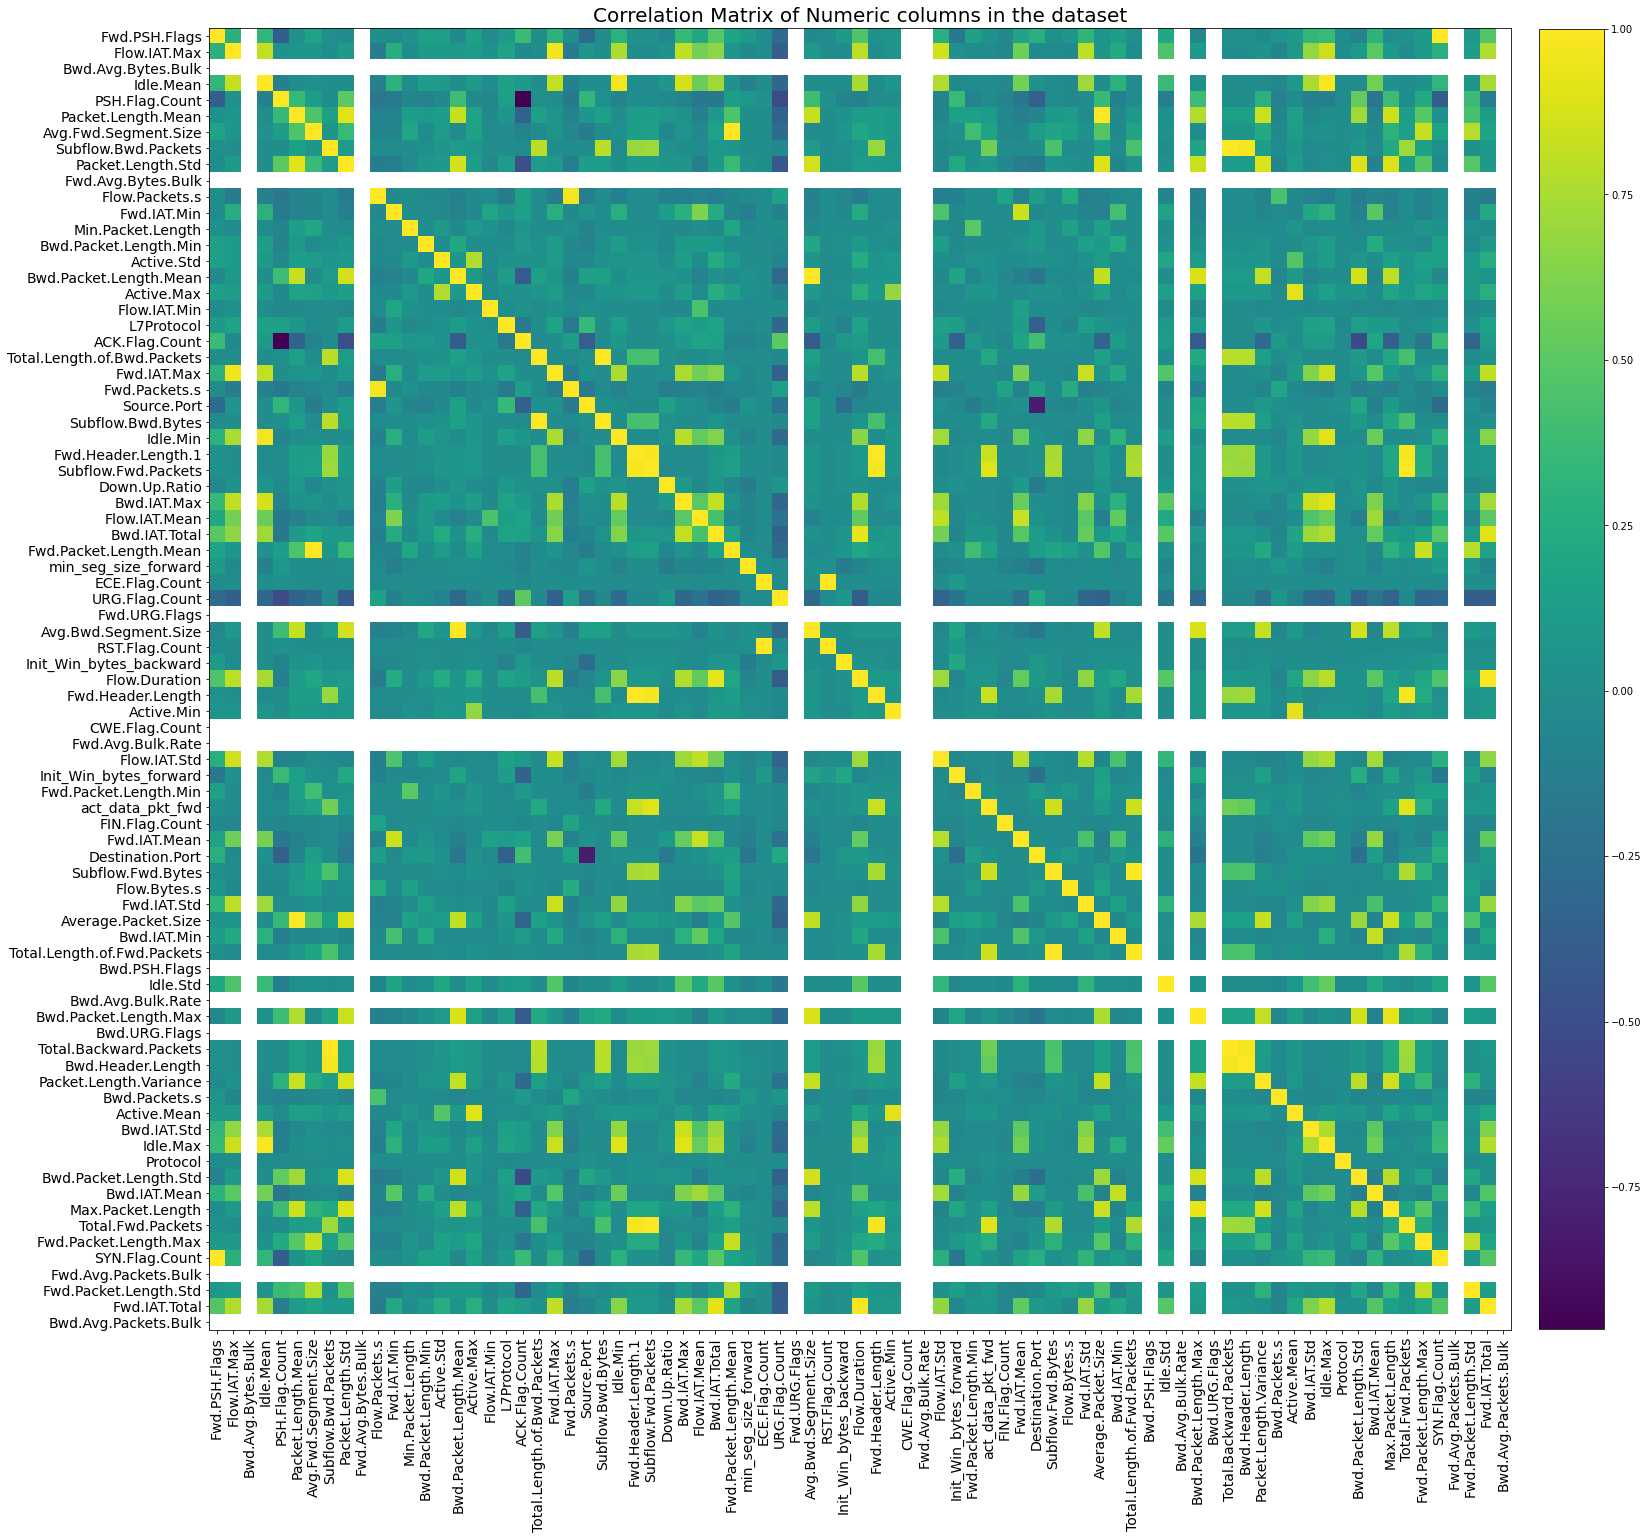

In [ ]:
 f = plt.figure(figsize = (25,25))
plt.matshow(corr, fignum=f.number)
plt.title('Correlation Matrix of Numeric columns in the dataset', fontsize = 20)
plt.xticks(range(len(num_cols)), num_cols, fontsize = 14, rotation = 90)
plt.yticks(range(len(num_cols)), num_cols, fontsize = 14)
plt.gca().xaxis.set_ticks_position('bottom')
cb = plt.colorbar(fraction = 0.0466, pad = 0.02)
cb.ax.tick_params(labelsize=10)
plt.show()

In [ ]:
ipdata = data.copy()

In [ ]:
print("No. of unique values in Timestamp column :",ipdata['Timestamp'].nunique())
print("No. of unique values in FlowID column :",ipdata['Flow.ID'].nunique())

No. of unique values in Timestamp column : 41915
No. of unique values in FlowID column : 1522917


In [ ]:
ipdata.drop(['Timestamp', 'Flow.ID'], axis = 1, inplace = True)

In [ ]:
single_unique_cols = [col for col in ipdata.columns if ipdata[col].nunique() == 1]
single_unique_cols


['Bwd.PSH.Flags',
 'Fwd.URG.Flags',
 'Bwd.URG.Flags',
 'CWE.Flag.Count',
 'Fwd.Avg.Bytes.Bulk',
 'Fwd.Avg.Packets.Bulk',
 'Fwd.Avg.Bulk.Rate',
 'Bwd.Avg.Bytes.Bulk',
 'Bwd.Avg.Packets.Bulk',
 'Bwd.Avg.Bulk.Rate',
 'Label']

In [ ]:
ipdata.drop(single_unique_cols, axis = 1, inplace = True)

In [ ]:
ip_add_cols = ['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port']
ipdata[ip_add_cols]

,Source.IP,Source.Port,Destination.IP,Destination.Port
0,172.19.1.46,52422,10.200.7.7,3128
1,10.200.7.7,3128,172.19.1.46,52422
2,50.31.185.39,80,10.200.7.217,38848
3,50.31.185.39,80,10.200.7.217,38848
4,192.168.72.43,55961,10.200.7.7,3128
...,...,...,...,...
3577291,98.138.79.73,443,10.200.7.199,42135
3577292,98.138.79.73,443,10.200.7.217,51546
3577293,98.138.79.73,443,10.200.7.218,44366
3577294,98.138.79.73,443,10.200.7.195,52341


In [ ]:
ipdata.drop(ip_add_cols, axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(ipdata['ProtocolName'])
ipdata['ProtocolName'] = encoder.fit_transform(ipdata['ProtocolName'])
ipdata['ProtocolName']

0          28
1          28
2          25
3          25
4          28
           ..
3577291    58
3577292    58
3577293    58
3577294    58
3577295    58
Name: ProtocolName, Length: 3577296, dtype: int64

In [ ]:
ipdata.head(10)

,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,6,45523,22,55,132,110414.0,6,6,6.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,28
1,6,1,2,0,12,0.0,6,6,6.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,28
2,6,1,3,0,674,0.0,337,0,224.666667,194.567041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,25
3,6,217,1,3,0,0.0,0,0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,25
4,6,78068,5,0,1076,0.0,529,6,215.200000,286.458898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,28
5,6,105069,136,0,313554,0.0,5840,6,2305.544118,1220.822406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,28
6,6,104443,5,0,1076,0.0,529,6,215.200000,286.458898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,28
7,6,11002,3,12,232,3664.0,226,0,77.333333,128.784057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130,26
8,6,108503,10,6,6904,1302.0,1448,0,690.400000,660.894209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91,58
9,6,118415,7,0,2210,0.0,1096,0,315.714286,533.043374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126,22


In [ ]:
ipdata.columns

Index(['Protocol', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count',
       'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', 'ACK.Flag.Count',
      

In [ ]:
ipdata = ipdata.iloc[:100000,:]

In [ ]:
ipdata.shape

(100000, 70)

In [ ]:
x = ipdata.drop(columns = ['ProtocolName','Fwd.Packet.Length.Std','Bwd.Packet.Length.Std','Fwd.IAT.Std','Bwd.IAT.Std','Fwd.Header.Length','Bwd.Header.Length','Packet.Length.Std','Packet.Length.Variance','Avg.Fwd.Segment.Size','Avg.Bwd.Segment.Size','Fwd.Header.Length.1','Subflow.Fwd.Packets','Subflow.Fwd.Bytes','Subflow.Bwd.Packets','Subflow.Bwd.Bytes','Init_Win_bytes_forward','Init_Win_bytes_backward','act_data_pkt_fwd','min_seg_size_forward'])
y = ipdata['ProtocolName']

In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [ ]:
a = y_train.to_numpy()
np.unique(a, return_counts=True)

(array([ 1,  2,  3,  4,  7,  9, 11, 13, 14, 16, 18, 20, 21, 22, 23, 25, 26,
        27, 28, 29, 30, 35, 36, 37, 38, 39, 43, 44, 53, 58, 59, 65, 67, 68,
        72, 74, 75, 76, 77]),
 array([ 1209,    14,    21,    13,     3,   234,   346,    10,   353,
           43,   507,     7,   647, 17038,    10, 27102,  6259,    21,
        11055,    10,    16,  1012,     3,   279,     1,    34,    61,
            4,   521,  8101,    35,     2,   331,     4,    71,   220,
          867,   439,  3097]))

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtc
tree_classify = dtc()
tree_classify.fit(x_train,y_train)
pred = tree_classify.predict(x_test)
explained_variance_score(pred,y_test)

0.9998448838219528

In [ ]:
#RNN

In [ ]:

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import sklearn
from sklearn import metrics
import tensorflow as tf
import os

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = data

In [ ]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['Total.Fwd.Packets','Flow.Duration','Total.Backward.Packets','Total.Length.of.Bwd.Packets','Total.Length.of.Fwd.Packets']])
y_predicted

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
df['Label']=y_predicted

In [ ]:
ct=0
for i in df['Label']:
    if i==0:
        ct=ct+1
ct

2717822

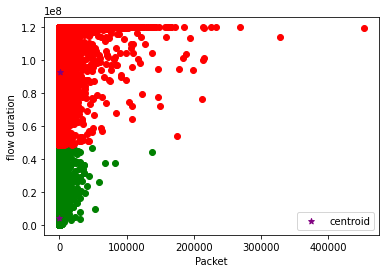

In [ ]:
df1 = df[df['Label']==0]
df2 = df[df['Label']==1]

plt.scatter(df1['Total.Fwd.Packets'],df1['Flow.Duration'],color='green')
plt.scatter(df2['Total.Fwd.Packets'],df2['Flow.Duration'],color='red')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Packet')
plt.ylabel('flow duration')
plt.legend()

In [ ]:
km.cluster_centers_
dataset = df

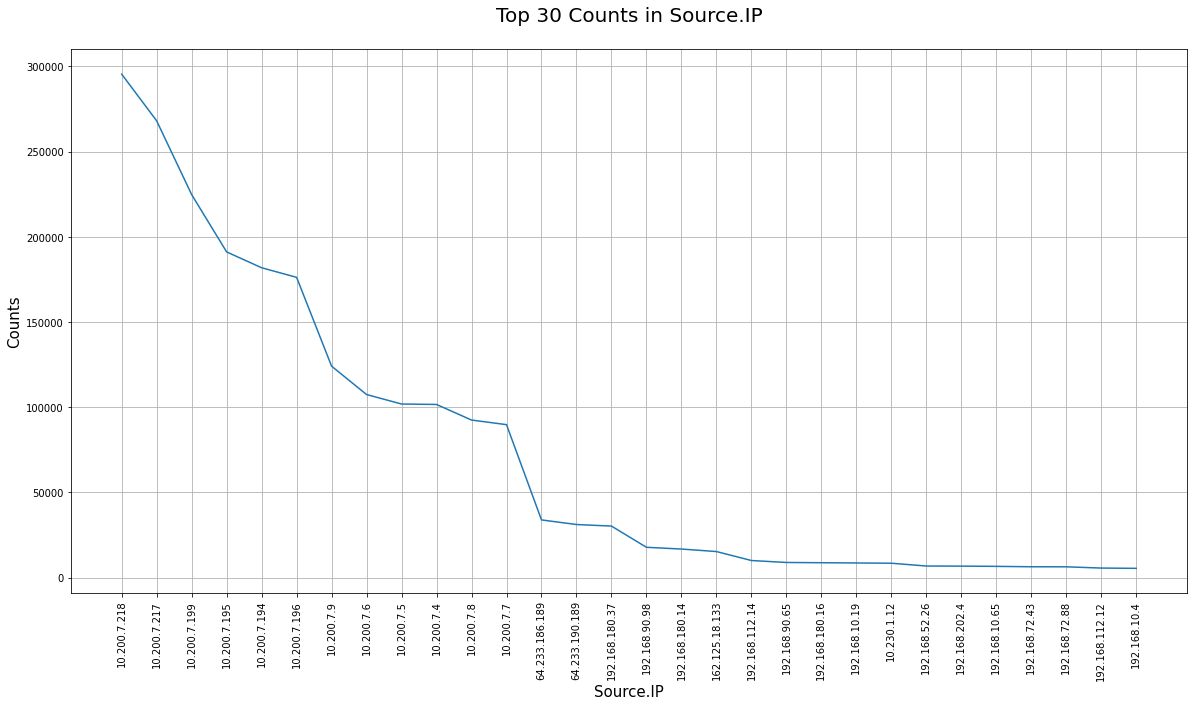

In [ ]:
# Histogram on Source.IP
Sour_feat = pd.DataFrame(dataset['Source.IP'].value_counts()[:30])
plt.figure(figsize=(20,10))
plt.plot(Sour_feat)
plt.xticks(rotation=90)
plt.xlabel('Source.IP', {'fontsize':15})
plt.ylabel('Counts', {'fontsize':15})
plt.title('Top 30 Counts in Source.IP\n', {'fontsize':20})
plt.grid()
plt.savefig('hist Source.IP.png')
Sour_feat = Sour_feat.reset_index()['index'].values

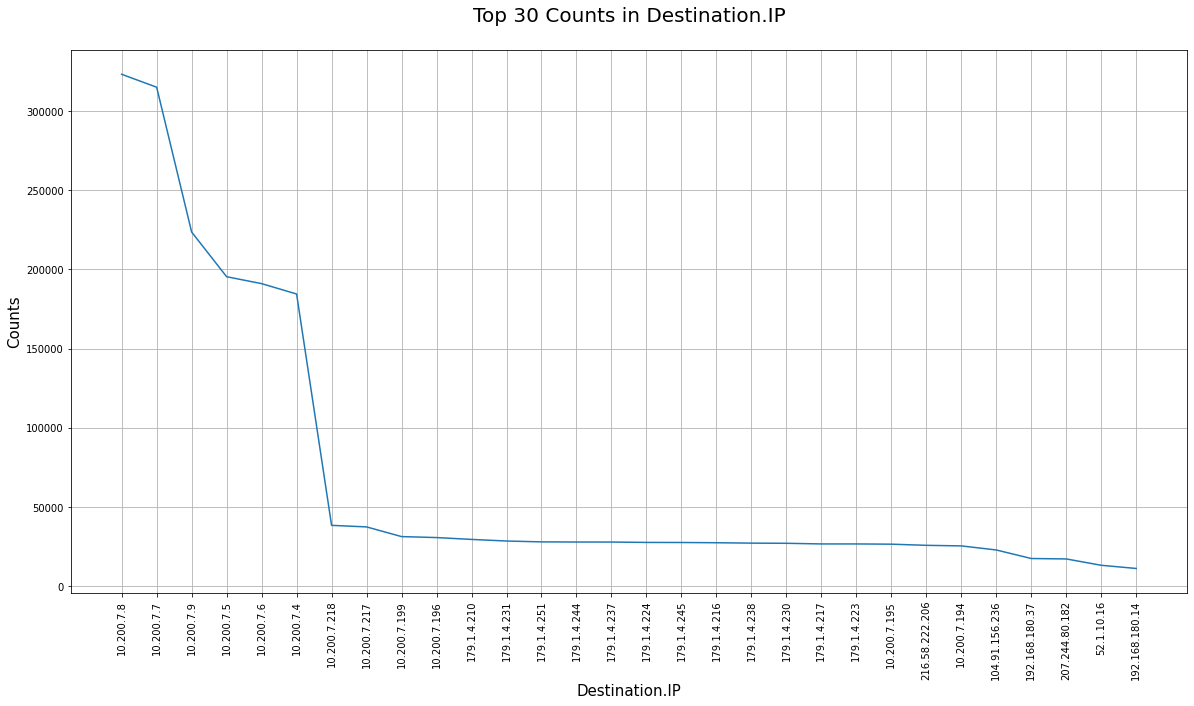

In [ ]:
# Histogram on Destination.IP
Dest_feat = pd.DataFrame(dataset['Destination.IP'].value_counts()[:30])
plt.figure(figsize=(20,10))
plt.plot(Dest_feat)
plt.xticks(rotation=90)
plt.xlabel('Destination.IP', {'fontsize':15})
plt.ylabel('Counts', {'fontsize':15})
plt.title('Top 30 Counts in Destination.IP\n', {'fontsize':20})
plt.grid()
plt.savefig('hist Destination.IP.png')
Dest_feat = Dest_feat.reset_index()['index'].values

In [ ]:
f_dataset = dataset[dataset['Destination.IP'].isin(Dest_feat) & dataset['Source.IP'].isin(Sour_feat)].reset_index()
f_dataset = f_dataset.drop('index', axis=1)

In [ ]:
# removing columns
f_dataset = f_dataset.drop(f_dataset.select_dtypes(include = ['object']).columns, axis = 1)
f_dataset = f_dataset.drop(['Source.Port','Destination.Port','L7Protocol','Protocol'], axis = 1)
f_dataset.columns

Index(['Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count',
       'SYN.Flag.Count', 'RST.Flag.Count', 'PS

In [ ]:
label = pd.get_dummies(f_dataset['Label'])

In [ ]:
f_dataset=f_dataset.drop(["Label"],axis=1)

In [ ]:
nr=8

In [ ]:
#RNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

from tensorflow.keras.layers import Embedding

In [ ]:
X=f_dataset
X.shape

(674133, 77)

In [ ]:
y=label
y.shape

(674133, 2)

In [ ]:
y=pd.DataFrame([x for x in np.where(y ==1, y.columns,'').flatten().tolist() if len(x) >0],columns= (["Output"]) )

In [ ]:
y=y.to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
#y

In [ ]:
print(X.shape)
print(y.shape)

(674133, 77)
(674133, 2)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [ ]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(134827, 77)
(134827, 2)
(539306, 77)
(539306, 2)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],1,X.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X.shape[1]))

In [ ]:
tf.keras.backend.clear_session()

model = Sequential()

model.add(LSTM(128, input_shape=(1,77),activation="relu",return_sequences=True))

model.add(LSTM(128,activation="relu"))

model.add(Dense(y.shape[1], activation='sigmoid'))
from tensorflow.keras.optimizers import SGD
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            105472    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 237,314
Trainable params: 237,314
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 3, 
                                        restore_best_weights = True)

In [ ]:
history = model.fit(X_train, y_train, epochs = nr, validation_data= (X_test, y_test),callbacks =[earlystopping])
history

Epoch 1/8
16854/16854 [==============================] - 194s 11ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0057 - val_accuracy: 0.9974
Epoch 2/8
16854/16854 [==============================] - 192s 11ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 0.0040 - val_accuracy: 0.9987
Epoch 3/8
16854/16854 [==============================] - 194s 12ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0064 - val_accuracy: 0.9984
Epoch 4/8
16854/16854 [==============================] - 190s 11ms/step - loss: 0.0160 - accuracy: 0.9986 - val_loss: 0.0033 - val_accuracy: 0.9991
Epoch 5/8
16854/16854 [==============================] - 203s 12ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0041 - val_accuracy: 0.9989
Epoch 6/8
16854/16854 [==============================] - 187s 11ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.0030 - val_accuracy: 0.9989
Epoch 7/8
16854/16854 [==============================] - 199s 12ms/step - loss: 0.0112 - accuracy: 0.9989 - val_

In [ ]:
acc2 = model.evaluate(X_test, y_test)

4214/4214 [==============================] - 18s 4ms/step - loss: 0.0204 - accuracy: 0.9977


In [ ]:
ans=model.predict(X_test)

4214/4214 [==============================] - 17s 4ms/step


In [ ]:
y_pred=np.argmax(ans, axis=1) 
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[107309,     79],
       [   234,  27205]])

<AxesSubplot:>

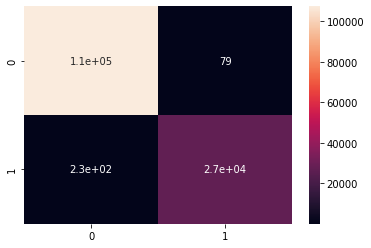

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True)


<AxesSubplot:>

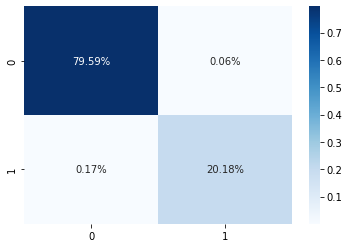

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
TP=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TN=cm[1][1]

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
prec_best=TP/(FP+TP)
sum=0
print("prec_best",prec_best)
for i in range(1,nr+1,1):
    sum=sum+pow(prec_best,i)
print("sum",sum)
av_prec=sum/nr
print("Average Precision av_prec",av_prec)

prec_best 0.9978241261634881
sum 7.922064938578765
Average Precision av_prec 0.9902581173223456
